# CEWA-566: Satellite Remote Sensing for Water Resources

## Introduction to Google Earth Engine   

### Instructions to begin this class

Note: 1. To install miniconda click [here](https://docs.conda.io/projects/miniconda/en/latest/)

Follow the steps to create python/conda environment
1. Create conda environment directory inside the directory you are working. <br>
    ```conda create -p ./.env```
2. Activate the created environment. <br> 
    ```conda activate ./.env```
3. Install mamba using conda. <br>
    ```conda install mamba -c conda-forge```
4. Install the required packages using mamba.<br>
    ```mamba install ipykernel geemap ipyleaflet earthengine-api numpy jupyterlab -c conda-forge```
       


### Initialization

In [ ]:
import ee
import numpy as np
import geemap

In [ ]:
ee.Authenticate()  # Only run for the first time.

In [ ]:
ee.Initialize()

### Client Variables

In [ ]:
course_no = 'CEWA-566'
course_name = 'Satellite Remote Sensing for Water Resources'
print(course_no, course_name)

credits = 3
print(credits)

course ={
    'course_no' : 'CEWA-566',
    'credits'  : 3
}
print(course['course_no'], course['credits'])

### Client Functions

In [ ]:
#function for addition
def add_num(a,b):
    sum=a+b
    return sum #return value

In [ ]:
add_num(6,9)

In [ ]:
# Arguments can be passed as a dictionary as well
add_num(**{'a':1,'b':5})

### Client's In-line Functions

In [ ]:
test_marks = [5,4,6,7]
corrected_marks = map(lambda x : x+2, test_marks)
print (test_marks)
print(corrected_marks)
print(list(corrected_marks))

### Classes & Objects: Variables and Methods 

An object is simply a collection of data (variables) and methods (functions). Similarly, a class is a blueprint for that object.



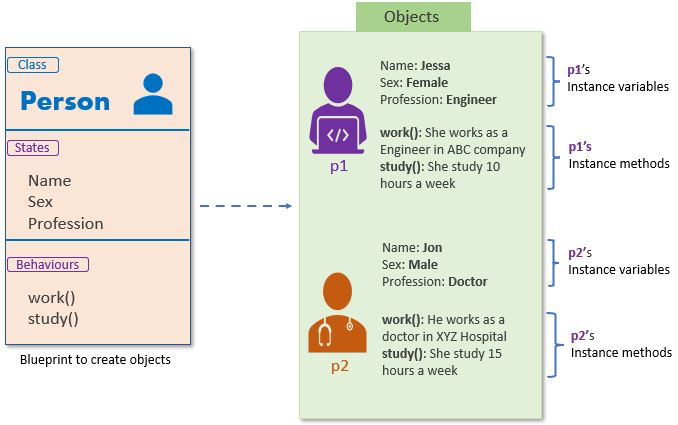

### Earth-Engine Variables

In [ ]:
# Strings
course_no = ee.String("CEWA-566")
course_name = ee.String("Satellite Remote Sensing for Water Resources")
print(course_no, course_name)

In [ ]:
# Number
credits = ee.Number(3)
print(credits)

In [ ]:
# List
test_marks = ee.List([5,4,6,7])
print(test_marks)

In [ ]:
# Dictionary
course = ee.Dictionary({
    'course_no' : 'CEWA-566',
    'credits'  : 25
})
print(course)

In [ ]:
# Function
corrected_marks = test_marks.map(lambda x: ee.Number(x).add(2))
print(corrected_marks)


In [ ]:
print(corrected_marks.getInfo())

### Images

Raster data are represented as Image objects in Earth Engine. Images are composed of one or more bands and each band has its own name, data type, scale, mask and projection. Each image has metadata stored as a set of properties.

Data Catalog: https://developers.google.com/earth-engine/datasets

**False Color Composite Images**:<br> 
False color images are a representation of a multi-spectral image produced using bands other than visible red, green and blue as the red, green and blue components of an image display. 

To know about different color composites, click [here](https://gisgeography.com/landsat-8-bands-combinations/)


#### Landsat 8 image as False Color Composite Image

In [ ]:
# Create a default map
Map = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_046027_20170103')

# Define the visualization parameters.
viz_Params = {'bands': ['B5', 'B4', 'B3'], 'min': 0, 'max': 0.5, 'gamma': [0.95, 1.1, 1]}

# Center the map and display the image.
Map.setCenter(-122.3328, 47.6061, 9)  # Seattle
Map.addLayer(image, viz_Params, 'false color composite')

# Display the map
Map

To explore more color composites, click [here](https://gisgeography.com/landsat-8-bands-combinations/) or try here in the notebook itself.

#### Finding Water using NDWI and coloring just that layer

Click [here](https://eos.com/make-an-analysis/ndwi/) to know more about NDWI.

In [ ]:
# Create a default map
Map = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_046027_20170103')

# Create an NDWI image, define visualization parameters and display.
ndwi = image.normalizedDifference(['B3', 'B5'])
ndwi_Viz_params = {'min': 0.5, 'max': 1, 'palette': ['00FFFF', '0000FF']}

# Center the map and display the image.
Map.setCenter(-122.3328, 47.6061, 9)  # Seattle
Map.addLayer(ndwi, ndwi_Viz_params, 'NDWI', False)

# Display the map
Map

#### Masking Non-Water Pixels in NDWI Image

In [ ]:
# Create a default map
Map = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_046027_20170103')

# Create an NDWI image, define visualization parameters and display.
ndwi = image.normalizedDifference(['B3', 'B5'])
ndwi_Viz_params = {'min': 0.5, 'max': 1, 'palette': ['00FFFF', '0000FF']}
Map.setCenter(-122.3328, 47.6061, 9)  # Seattle
Map.addLayer(ndwi, ndwi_Viz_params, 'NDWI', False)

# Mask the non-watery parts of the image, where NDWI < 0.3.
ndwiMasked = ndwi.updateMask(ndwi.gte(0.3))
Map.addLayer(ndwiMasked, ndwi_Viz_params, 'NDWI masked')

# Adding colorbar
Map.add_colorbar(ndwi_Viz_params, label="NDWI", layer_name="NDWI masked")

# Adding Legend
Map.add_legend(
    title="NDWI",
    legend_dict={'Less NDWI':'00FFFF', 'High NDWI':'0000FF'},
    layer_name='NDWI masked',
)

# Display the map
Map

#### Converting Images to Visualization Layers

In [ ]:
# Create a default map
Map = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_046027_20170103')

# Create an NDWI image, define visualization parameters and display.
ndwi = image.normalizedDifference(['B3', 'B5'])
ndwiViz = {'min': 0.5, 'max': 1, 'palette': ['00FFFF', '0000FF']}
Map.setCenter(-122.3328, 47.6061, 9)  # Seattle
Map.addLayer(ndwi, ndwiViz, 'NDWI', False)

# Mask the non-watery parts of the image, where NDWI < 0.3.
ndwiMasked = ndwi.updateMask(ndwi.gte(0.3))
Map.addLayer(ndwiMasked, ndwiViz, 'NDWI masked')

# Create visualization layers.
imageRGB = image.visualize(**{'bands': ['B5', 'B4', 'B3'], 'max': 0.5})
ndwiRGB = ndwiMasked.visualize(
    **{'min': 0.5, 'max': 1, 'palette': ['00FFFF', '0000FF']}
)

Map.addLayer(imageRGB, {}, 'imageRGB')
Map.addLayer(ndwiRGB, {}, 'ndwiRGB')

# Display the map
Map

#### Creating a mosaic image

In general, compositing refers to the process of combining spatially overlapping images into a single image based on an aggregation function. Mosaicking refers to the process of spatially assembling image datasets to produce a spatially continuous image. In Earth Engine, these terms are used interchangeably, though both compositing and mosaicking are supported.

In [ ]:
# Create a default map
Map = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_046027_20170103')

# Create an NDWI image, define visualization parameters and display.
ndwi = image.normalizedDifference(['B3', 'B5'])
ndwiViz = {'min': 0.5, 'max': 1, 'palette': ['00FFFF', '0000FF']}
Map.setCenter(-122.3328, 47.6061, 9)  # Seattle
Map.addLayer(ndwi, ndwiViz, 'NDWI', False)

# Mask the non-watery parts of the image, where NDWI < 0.3.
ndwiMasked = ndwi.updateMask(ndwi.gte(0.3))
Map.addLayer(ndwiMasked, ndwiViz, 'NDWI masked')

# Create visualization layers.
imageRGB = image.visualize(**{'bands': ['B5', 'B4', 'B3'], 'max': 0.5})
ndwiRGB = ndwiMasked.visualize(
    **{'min': 0.5, 'max': 1, 'palette': ['00FFFF', '0000FF']}
)

Map.addLayer(imageRGB, {}, 'imageRGB')
Map.addLayer(ndwiRGB, {}, 'ndwiRGB')

# Mosaic the visualization layers and display (or export).
mosaic = ee.ImageCollection([imageRGB, ndwiRGB]).mosaic()
Map.addLayer(mosaic, {}, 'mosaic')

# Display the map
Map

#### Clipping an image

In [ ]:
# Create a default map
Map = geemap.Map()

# Load an image.
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_046027_20170103')

# Create an NDWI image, define visualization parameters and display.
ndwi = image.normalizedDifference(['B3', 'B5'])
ndwiViz = {'min': 0.5, 'max': 1, 'palette': ['00FFFF', '0000FF']}
Map.setCenter(-122.3328, 47.6061, 10)  # Seattle
Map.addLayer(ndwi, ndwiViz, 'NDWI', False)

# Mask the non-watery parts of the image, where NDWI < 0.3.
ndwiMasked = ndwi.updateMask(ndwi.gte(0.3))
Map.addLayer(ndwiMasked, ndwiViz, 'NDWI masked')

# Create visualization layers.
imageRGB = image.visualize(**{'bands': ['B5', 'B4', 'B3'], 'max': 0.5})
ndwiRGB = ndwiMasked.visualize(
    **{'min': 0.5, 'max': 1, 'palette': ['00FFFF', '0000FF']}
)

Map.addLayer(imageRGB, {}, 'imageRGB')
Map.addLayer(ndwiRGB, {}, 'ndwiRGB')

# Mosaic the visualization layers and display (or export).
mosaic = ee.ImageCollection([imageRGB, ndwiRGB]).mosaic()
Map.addLayer(mosaic, {}, 'mosaic')

# Create a circle by drawing a 30000 meter buffer around a point.
roi = ee.Geometry.Point([-122.3328, 47.6061]).buffer(30000)
clipped = mosaic.clip(roi)

# Display a clipped version of the mosaic.
Map.addLayer(clipped, {}, 'Clipped image')

# Display the map
Map

#### Extracting Image MetaData

In [ ]:
# Printing Band Names
bandNames = image.bandNames()
print('Band names: ', bandNames.getInfo())

In [ ]:
# Printing resolution of B1 band
b1_projection = image.select('B1').projection()
print('Band 1 projection: ', b1_projection.getInfo())

In [ ]:
# Printing scale of B10 band
b10_scale = image.select('B10').projection().nominalScale()
############## Complete the code ###############
print('Band 10 scale: ', )

In [ ]:
# Print Metadata properties
properties = image.propertyNames()
'Metadata properties: ', properties.getInfo()

In [ ]:
# Print Cloud Cover
cloudiness = image.get('CLOUD_COVER')
print('CLOUD_COVER: ', cloudiness.getInfo())

In [ ]:
# Print Date
############## Complete the code ###############
date = 
print('Timestamp: ', )

In [ ]:
# Print Date
############## Complete the code ###############
date2 = ee.Date()
date2 = date2.format('YYYY-MM-dd')
############## Complete the code ###############
print('Timestamp: ', )

In [ ]:
# Using geemap to extract properties
image_props = geemap.image_props(image)
image_props.getInfo()

#### Selecting & Renaming

In [ ]:
new_image = image.select(['B5', 'B4', 'B3'], ['NIR', 'Red', 'Green'])
############## Complete the code ###############
bandNames = 
print('Band names: ', bandNames.getInfo())

#### Computations

Only the intersection of unmasked pixels between the two inputs are considered and returned as unmasked, all else are masked. In general, if either input has only one band, then it is used against all the bands in the other input. If the inputs have the same number of bands, but not the same names, they're used pairwise in the natural order. The output bands are named for the longer of the two inputs, or if they're equal in length, in the first input's order. The type of the output pixels is the union of the input types.

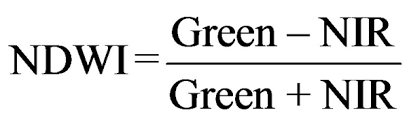

In [ ]:
# Load an image with path 'LANDSAT/LC08/C02/T1_TOA/LC08_046027_20170103'
############## Complete the code ###############
image = 

# Get the bands NIR - B5 and Green - B3
############## Complete the code ###############
NIR = 
Green = 

# compute ndwi 
ndwi = Green.subtract(NIR).divide(Green.add(NIR))

# Mask the non-watery parts of the image, where NDWI < 0.3.
############## Complete the code ###############


# Plot NDWI
############## Complete the code ###############

To know more about other types of operations possible using earth engine, click [here](https://developers.google.com/earth-engine/guides/image_relational)

In [ ]:
# Load an image with path 'LANDSAT/LC08/C02/T1_TOA/LC08_046027_20170103'
############## Complete the code ###############
image = 

# Compute the NDWI using an expression.
ndwi = image.expression(
    '(GREEN - NIR) / (NIR + GREEN)',
    {'NIR': image.select('B5'), 'GREEN': image.select('B3')},
)

# Plot NDWI
############## Complete the code ###############


## Thank You & Have Fun! 😃